# Interpretation of geophysical logs using Random Forest (with improved blocking)-- Himanshu Bhardwaj

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('DataSet.csv')
X.head()

GR    NPHI    DPHI     PEF  PICK  TRUE
0  18.4445  0.1263  0.0973  2.5341     7     7
1  18.4814  0.1138  0.0882  2.5683     7     7
2  17.9632  0.1100  0.0890  2.5396     7     7
3  16.0150  0.1213  0.1170  2.3682     7     7
4  14.6361  0.1112  0.1520  2.1106    10    10

In [3]:
Lith = pd.read_csv('Lithology.csv')
Lith.columns = ['TRUE', 'Lithology']
Lith

TRUE                   Lithology
0      2                      Halite
1      3                      Gypsum
2      4                    Dolomite
3      5         Dolomitic Limestone
4      6  Cherty Dolomitic Limestone
5      7             Cherty Dolomite
6      8                   Limestone
7      9            Cherty Limestone
8     10                       Chert
9     11                       Shale
10    12                  Sand Stone
11    13                   Ironstone
12    14                        Coal

In [4]:
X = X.merge(Lith, on = 'TRUE')
X

GR    NPHI    DPHI     PEF  PICK  TRUE        Lithology
0     18.4445  0.1263  0.0973  2.5341     7     7  Cherty Dolomite
1     18.4814  0.1138  0.0882  2.5683     7     7  Cherty Dolomite
2     17.9632  0.1100  0.0890  2.5396     7     7  Cherty Dolomite
3     16.0150  0.1213  0.1170  2.3682     7     7  Cherty Dolomite
4     17.4286  0.0877  0.0846  2.3734     7     7  Cherty Dolomite
...       ...     ...     ...     ...   ...   ...              ...
4583  76.6608  0.2786 -0.1766  7.2234    13    13        Ironstone
4584  74.0910  0.2434 -0.3404  9.8867    13    13        Ironstone
4585  74.3129  0.2507 -0.3196  9.5217    13    13        Ironstone
4586  75.2727  0.2559 -0.2908  9.0778    13    13        Ironstone
4587  75.4389  0.2714 -0.1917  7.5577    13    13        Ironstone

[4588 rows x 7 columns]

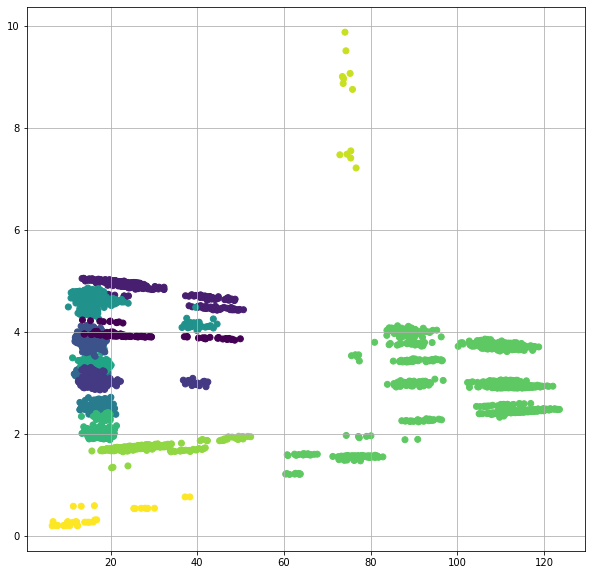

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(X['GR'], X['PEF'], c = X['TRUE'])
plt.grid(True)

In [6]:
X['TRUE'].unique()

array([ 7, 10,  6,  9,  4, 11,  3,  8,  5, 12, 14,  2, 13], dtype=int64)

In [7]:
X.describe()

GR         NPHI         DPHI          PEF         PICK  \
count  4588.000000  4588.000000  4588.000000  4588.000000  4588.000000   
mean     42.538022     0.170240     0.086140     3.249794     8.037489   
std      38.697864     0.112767     0.107973     1.057905     3.246623   
min       6.530300    -0.013100    -0.340400     0.201700     2.000000   
25%      15.833425     0.084300     0.040200     2.457825     5.000000   
50%      19.422100     0.132800     0.067200     3.256600     8.000000   
75%      77.206075     0.258525     0.121650     3.876075    11.000000   
max     123.579600     0.591000     0.620300     9.886700    14.000000   

              TRUE  
count  4588.000000  
mean      8.037489  
std       3.246623  
min       2.000000  
25%       5.000000  
50%       8.000000  
75%      11.000000  
max      14.000000

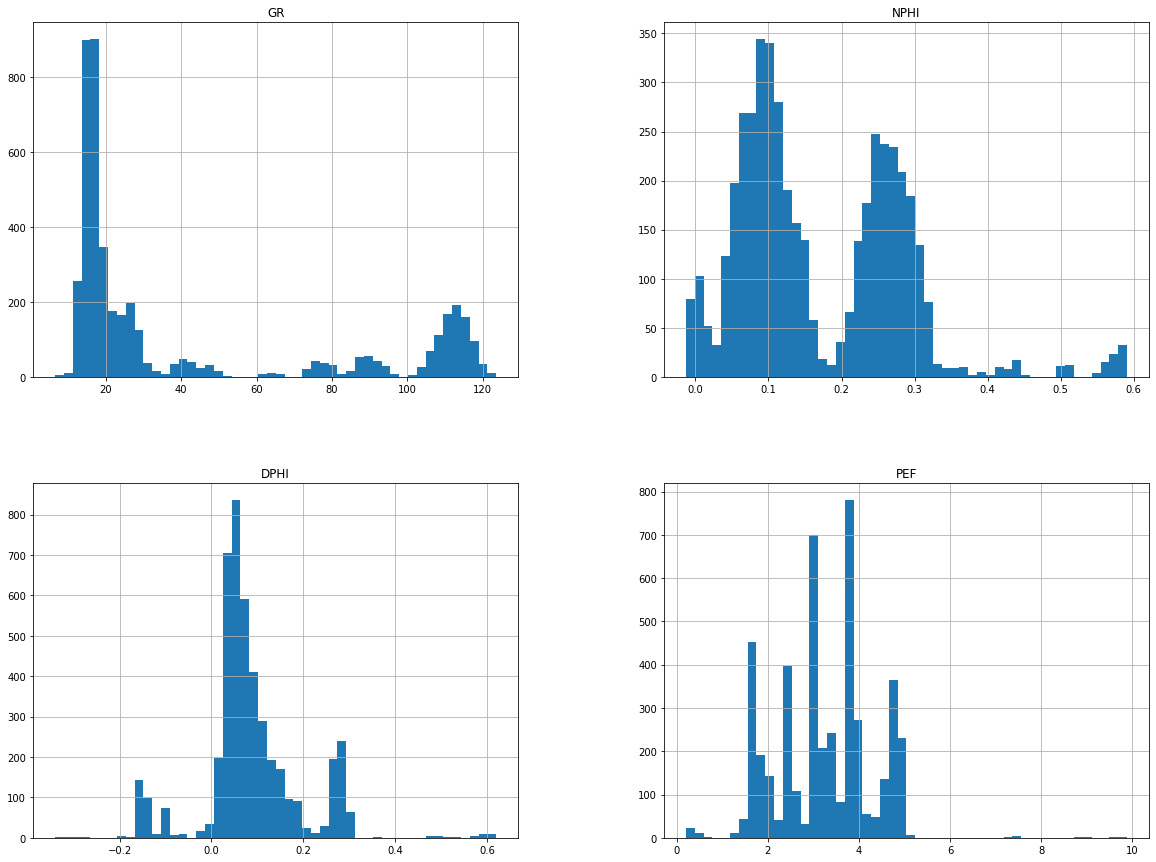

In [8]:
X[['GR','NPHI','DPHI','PEF']].hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [10]:
X['TRUE'].value_counts()

11    1236
5      648
12     532
8      476
4      440
3      340
9      244
10     188
6      180
7      148
2      108
14      36
13      12
Name: TRUE, dtype: int64

In [11]:
train, test = train_test_split(X, test_size=0.3, random_state=52)

In [12]:
train

GR    NPHI    DPHI     PEF  PICK  TRUE                   Lithology
3105  12.4704  0.0561  0.0494  4.7901     8     8                   Limestone
3453  14.1730  0.1169  0.0580  3.7950     5     5         Dolomitic Limestone
1747  93.6546  0.2295  0.0129  3.4441    11    11                       Shale
3331  14.8084  0.1141  0.0560  3.8695     5     5         Dolomitic Limestone
4033  21.8210  0.2482  0.2960  1.6975    12    12                  Sand Stone
...       ...     ...     ...     ...   ...   ...                         ...
503   15.7591  0.1150  0.0962  3.2263     6     6  Cherty Dolomitic Limestone
924   15.0700  0.1194  0.0264  2.9573     4     4                    Dolomite
4247  40.3892  0.2432  0.2350  1.7168    12    12                  Sand Stone
2827  16.8285  0.0553  0.0475  4.7720     8     8                   Limestone
1692  88.4041  0.3521  0.0791  3.7741    11    11                       Shale

[3211 rows x 7 columns]

In [13]:
pp = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=52)

In [14]:
pp.get_n_splits(X, X['TRUE'])

1

In [15]:
X_train = []
X_test = []
for train_index, test_index in pp.split(X, X['TRUE']):
    X_train.append(X.loc[train_index])
    X_test.append(X.loc[test_index])

In [16]:
train = X_train[-1]
test = X_test[-1]

In [17]:
train_X = train[['GR', 'PEF']]
test_X = test[['GR','PEF']]

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scale = StandardScaler()
train_X = scale.fit_transform(train_X)
test_X = scale.fit_transform(test_X)

In [20]:
test_X

array([[-0.71727101,  0.52930926],
       [-0.68938788,  0.64570463],
       [ 1.16886366,  0.67961805],
       ...,
       [-0.63652504, -0.01236602],
       [ 0.87502235, -1.57041053],
       [-0.42828164, -1.38421552]])

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rn = RandomForestClassifier()

In [23]:
model = rn.fit(train_X, train['TRUE'])

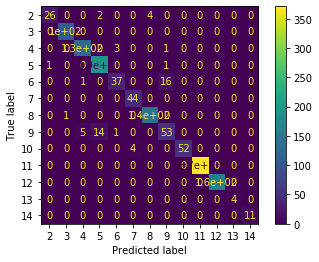

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, test_X, test['TRUE'])

In [25]:
import joblib

In [26]:
joblib.dump(model, "RF_uncompressed1.joblib", compress=0) 

['RF_uncompressed1.joblib']

In [27]:
loaded_rf = joblib.load("RF_uncompressed1.joblib")

In [28]:
pred_test = loaded_rf.predict(test_X)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test['TRUE'], pred_test))

0.9607843137254902


**Testing the model on real data set**

In [30]:
df = pd.read_csv('GPH.csv')
df.head()

DEPT    MNOR    MINV    NPHS    NPHL    NPHI    NPHD    RHOB      QN  \
0  1510.0 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   
1  1510.5 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   
2  1511.0 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   
3  1511.5 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   
4  1512.0 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   

       QF  ...     RT30    RT20    RT10         RT    RMUD  CT90       GR  \
0 -999.25  ...  16.0478  4.9457  3.3305  1999.9999  0.7480   0.5  46.7784   
1 -999.25  ...  18.5982  5.8843  3.9779  1999.9999  0.7493   0.5  55.8934   
2 -999.25  ...  18.9170  6.0046  4.0613  1999.9999  0.7462   0.5  63.6936   
3 -999.25  ...  17.3583  5.5102  3.7269  1999.9999  0.7506   0.5  63.2478   
4 -999.25  ...  15.9935  5.0936  3.4468  1999.9999  0.7484   0.5  56.8072   

     CALI       SP       TENS  
0  8.2796  10.6159  1630.1848  
1  8.2768  13.4429  1621.8538  
2  8.2539  15.1650  1604.8956  
3  8.1957  15.0992  1603.8457  
4  8.2572  15.1214  1608.6721  

[5 rows x 30 columns]

In [31]:
df1 = df[['DEPT', 'GR', 'PE']]

In [32]:
df1

DEPT        GR      PE
0     1510.0   46.7784 -999.25
1     1510.5   55.8934 -999.25
2     1511.0   63.6936 -999.25
3     1511.5   63.2478 -999.25
4     1512.0   56.8072 -999.25
...      ...       ...     ...
7091  5055.5 -999.2500 -999.25
7092  5056.0 -999.2500 -999.25
7093  5056.5 -999.2500 -999.25
7094  5057.0 -999.2500 -999.25
7095  5057.5 -999.2500 -999.25

[7096 rows x 3 columns]

In [33]:
data = df1[['GR', 'PE']]
data['Depth'] = df1['DEPT']
data

GR      PE   Depth
0      46.7784 -999.25  1510.0
1      55.8934 -999.25  1510.5
2      63.6936 -999.25  1511.0
3      63.2478 -999.25  1511.5
4      56.8072 -999.25  1512.0
...        ...     ...     ...
7091 -999.2500 -999.25  5055.5
7092 -999.2500 -999.25  5056.0
7093 -999.2500 -999.25  5056.5
7094 -999.2500 -999.25  5057.0
7095 -999.2500 -999.25  5057.5

[7096 rows x 3 columns]

In [34]:
data.replace(-999.25, np.nan, inplace=True)

In [35]:
data = data.fillna(method='ffill')
data = data.dropna()

In [36]:
#data['Depth'] = data.index
#data

In [37]:
md = scale.fit_transform(data[['GR', 'PE']])

In [38]:
predicted_value = model.predict(md)

In [39]:
data['Predicted_Value'] = predicted_value

In [40]:
data = data.merge(Lith, left_on='Predicted_Value', right_on = 'TRUE')

In [41]:
data = data.sort_values('Depth', ascending=True)

In [42]:
#data.drop(['color_code', 'Hatch'], axis=1, inplace=True)

In [43]:
df1 = df[['DEPT', 'GR', 'PE']]
df1['Depth'] = df1['DEPT']
df1 = df1.drop('DEPT', axis=1)
df1

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


GR      PE   Depth
0      46.7784 -999.25  1510.0
1      55.8934 -999.25  1510.5
2      63.6936 -999.25  1511.0
3      63.2478 -999.25  1511.5
4      56.8072 -999.25  1512.0
...        ...     ...     ...
7091 -999.2500 -999.25  5055.5
7092 -999.2500 -999.25  5056.0
7093 -999.2500 -999.25  5056.5
7094 -999.2500 -999.25  5057.0
7095 -999.2500 -999.25  5057.5

[7096 rows x 3 columns]

In [44]:
df1.replace(-999.25, np.nan, inplace=True)

In [45]:
df1 = df1.dropna()
df1

GR      PE   Depth
3370  74.7029  4.7732  3195.0
3371  72.7194  4.7937  3195.5
3372  69.7554  4.8635  3196.0
3373  74.6137  4.8484  3196.5
3374  75.5497  4.7579  3197.0
...       ...     ...     ...
7006  55.6728  3.9284  5013.0
7007  54.6202  4.0378  5013.5
7008  53.8132  4.1237  5014.0
7009  54.1655  4.1104  5014.5
7010  54.1655  4.1972  5015.0

[3641 rows x 3 columns]

In [46]:
#data.sort_values(by='Depth', inplace=True)

In [47]:
Lith['color_code'] = np.array(['#7ddfbe','#ff80ff', '#8080ff', '#8088ff','#88ffff','#8080ff',
                              '#80ffff','#80ffff','#ff8c00', '#bebebe','#ffe119','#7cfc00','black'])
Lith['Hatch'] = np.array(['x','||','-/','-./','./','+','.+','..','-.','..','--','//-',''])
Lith

TRUE                   Lithology color_code Hatch
0      2                      Halite    #7ddfbe     x
1      3                      Gypsum    #ff80ff    ||
2      4                    Dolomite    #8080ff    -/
3      5         Dolomitic Limestone    #8088ff   -./
4      6  Cherty Dolomitic Limestone    #88ffff    ./
5      7             Cherty Dolomite    #8080ff     +
6      8                   Limestone    #80ffff    .+
7      9            Cherty Limestone    #80ffff    ..
8     10                       Chert    #ff8c00    -.
9     11                       Shale    #bebebe    ..
10    12                  Sand Stone    #ffe119    --
11    13                   Ironstone    #7cfc00   //-
12    14                        Coal      black

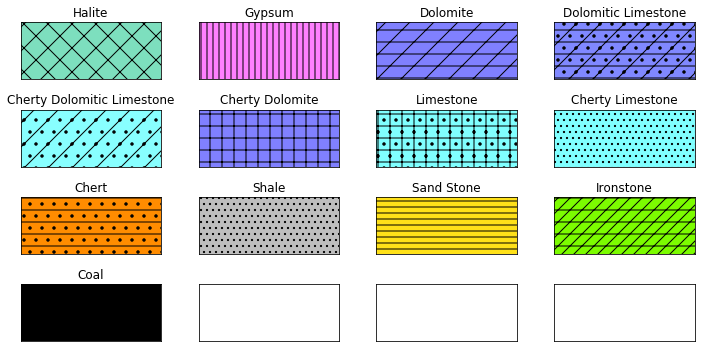

In [48]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=4, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, Lith.index):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=Lith.iloc[key]['color_code'], hatch=Lith.iloc[key]['Hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(Lith.iloc[key]['Lithology']))

plt.tight_layout()

plt.show()

<Figure size 1080x1440 with 0 Axes>

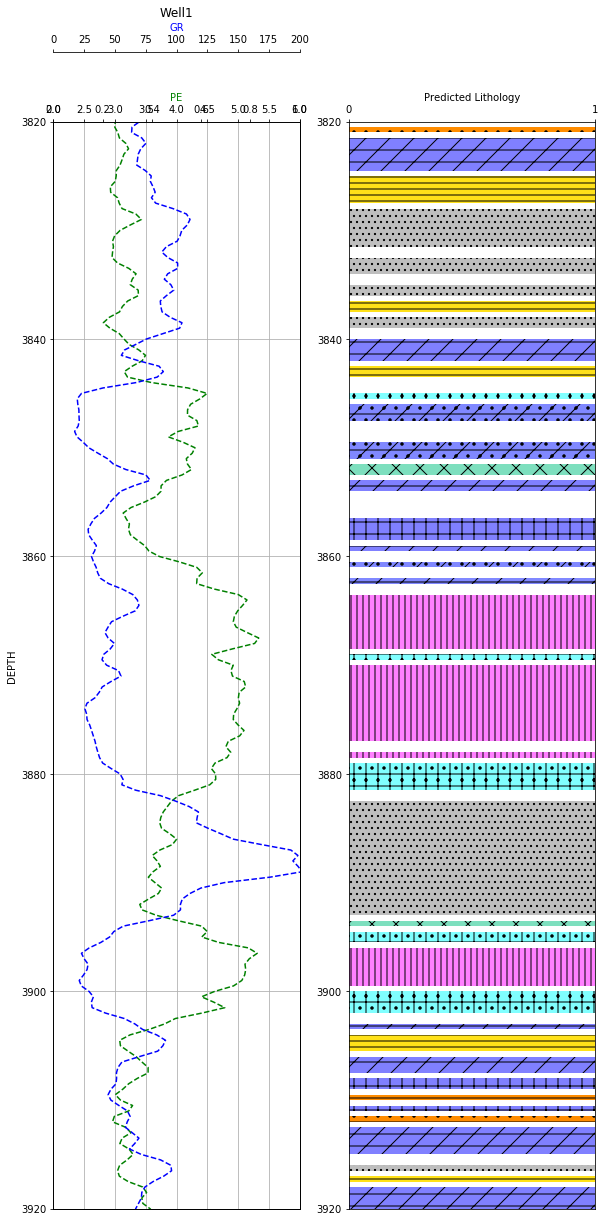

In [49]:
import hemi_lith as hp
hp.plot_Lith(data, Lith, 3820, 3920)

We observe gaps in the output at the boundaries of beds.  This problem can be removed by blocking the logs. 

# Blocking is not used above blocking will further imporve the result

In [50]:
ndata = df1
ndata.head()

GR      PE   Depth
3370  74.7029  4.7732  3195.0
3371  72.7194  4.7937  3195.5
3372  69.7554  4.8635  3196.0
3373  74.6137  4.8484  3196.5
3374  75.5497  4.7579  3197.0

In [51]:
#ndata.index = ndata['Depth']
ndata.head()

GR      PE   Depth
3370  74.7029  4.7732  3195.0
3371  72.7194  4.7937  3195.5
3372  69.7554  4.8635  3196.0
3373  74.6137  4.8484  3196.5
3374  75.5497  4.7579  3197.0

In [52]:
import hemi_imp_blocking as hb
ddf = hb.block_multiple(ndata, ['GR', 'PE'])

D:\Kansas oil and gas\geophysical logs 2017\selected files\My Log Visualization codes\hemi_imp_blocking.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['d'+log] = dt[log].diff(1)
D:\Kansas oil and gas\geophysical logs 2017\selected files\My Log Visualization codes\hemi_imp_blocking.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['d'+log] = dt[log].diff(1)


In [53]:
ddf

Depth         GR        PE
0     3195.940032  69.497981  4.872633
1     3196.123660  69.497981  4.872633
1     3196.443986  69.497981  4.872633
2     3196.526435  69.497981  4.872633
3     3196.526435  75.545649  4.872633
...           ...        ...       ...
4710  5013.687098  53.808508  4.125405
4711  5014.114573  53.808508  4.125405
5125  5014.166440  53.808508  4.125405
4712  5014.542048  53.808508  4.125405
5126  5014.646365  53.808508  4.125405

[9839 rows x 3 columns]

In [54]:
md1 = scale.fit_transform(ddf[['GR', 'PE']])

In [55]:
predicted_value1 = model.predict(md1)

In [56]:
ddf['Predicted_Value'] = predicted_value1

In [57]:
ddf

Depth         GR        PE  Predicted_Value
0     3195.940032  69.497981  4.872633                3
1     3196.123660  69.497981  4.872633                3
1     3196.443986  69.497981  4.872633                3
2     3196.526435  69.497981  4.872633                3
3     3196.526435  75.545649  4.872633                3
...           ...        ...       ...              ...
4710  5013.687098  53.808508  4.125405                2
4711  5014.114573  53.808508  4.125405                2
5125  5014.166440  53.808508  4.125405                2
4712  5014.542048  53.808508  4.125405                2
5126  5014.646365  53.808508  4.125405                2

[9839 rows x 4 columns]

In [58]:
ddf1 = ddf
#ddf1.set_index('Depth', inplace=True)

In [59]:
#ddf = ddf.merge(Lith, left_on='Predicted_Value', right_on = 'TRUE')
#ddf1.drop(['color_code', 'Hatch'], axis=1, inplace=True)
#ddf.sort_values(by='Depth', inplace=True)

In [60]:
ddf1.merge(Lith, left_on = 'Predicted_Value', right_on='TRUE')
#ddf1.drop(['color_code', 'Hatch'], axis=1, inplace=True)

Depth          GR        PE  Predicted_Value  TRUE  Lithology  \
0     3195.940032   69.497981  4.872633                3     3     Gypsum   
1     3196.123660   69.497981  4.872633                3     3     Gypsum   
2     3196.443986   69.497981  4.872633                3     3     Gypsum   
3     3196.526435   69.497981  4.872633                3     3     Gypsum   
4     3196.526435   75.545649  4.872633                3     3     Gypsum   
...           ...         ...       ...              ...   ...        ...   
9834  3497.437263  123.592299  5.440755               13    13  Ironstone   
9835  3497.437263  130.943412  5.440755               13    13  Ironstone   
9836  3498.017260  130.943412  5.440755               13    13  Ironstone   
9837  3498.041064  130.943412  5.440755               13    13  Ironstone   
9838  3498.597256  130.943412  5.440755               13    13  Ironstone   

     color_code Hatch  
0       #ff80ff    ||  
1       #ff80ff    ||  
2       #ff80ff    ||  
3       #ff80ff    ||  
4       #ff80ff    ||  
...         ...   ...  
9834    #7cfc00   //-  
9835    #7cfc00   //-  
9836    #7cfc00   //-  
9837    #7cfc00   //-  
9838    #7cfc00   //-  

[9839 rows x 8 columns]

<Figure size 1080x1440 with 0 Axes>

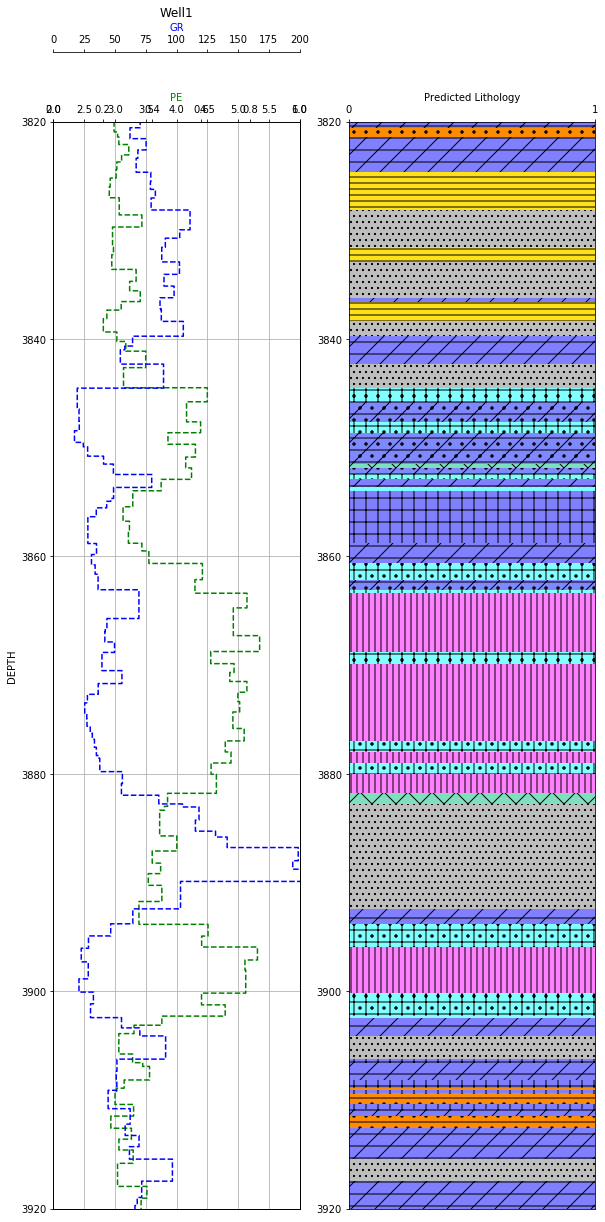

In [61]:
import hemi_lith as hp
hp.plot_Lith(ddf1, Lith, 3820, 3920)

Improved predicted result is plotted above with Photo electric cross logs and Natural Gamma ray logs are shown above.

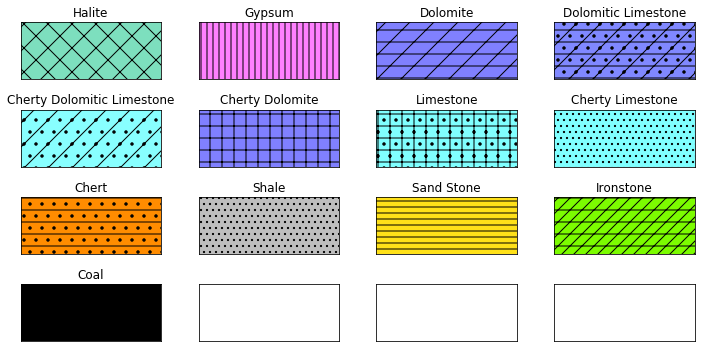

In [62]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=4, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, Lith.index):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=Lith.iloc[key]['color_code'], hatch=Lith.iloc[key]['Hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(Lith.iloc[key]['Lithology']))

plt.tight_layout()

plt.show()

In [63]:
ddf1.to_csv('predicted_result.csv')

In [67]:
np.array(Lith['Lithology'])

array(['Halite', 'Gypsum', 'Dolomite', 'Dolomitic Limestone',
       'Cherty Dolomitic Limestone', 'Cherty Dolomite', 'Limestone',
       'Cherty Limestone', 'Chert', 'Shale', 'Sand Stone', 'Ironstone',
       'Coal'], dtype=object)

In [69]:
from sklearn import tree

In [72]:
fn=np.array(['GR','PE'])
cn=np.array(Lith['Lithology'])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,24), dpi=800)
tree.plot_tree(rn.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rn_individualtree.png')